In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib notebook

In [20]:
img = cv2.imread('sign9.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.GaussianBlur(img, (3,3), 0)
plt.imshow(img)

<IPython.core.display.Javascript object>


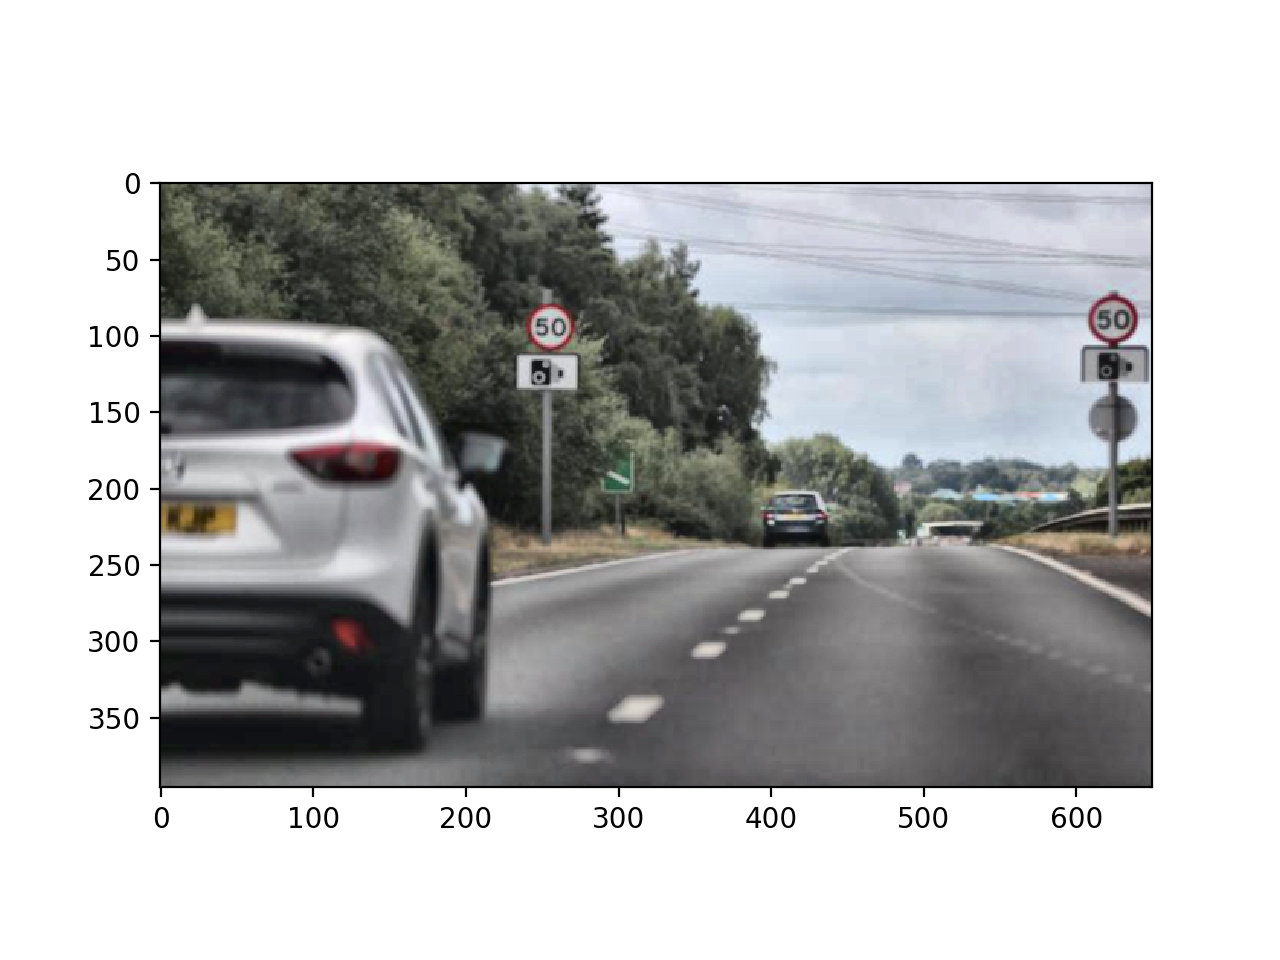

In [13]:
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

lab_planes = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(10,10))

lab_planes[0] = clahe.apply(lab_planes[0])

lab = cv2.merge(lab_planes)

img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

plt.imshow(img)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


<IPython.core.display.Javascript object>


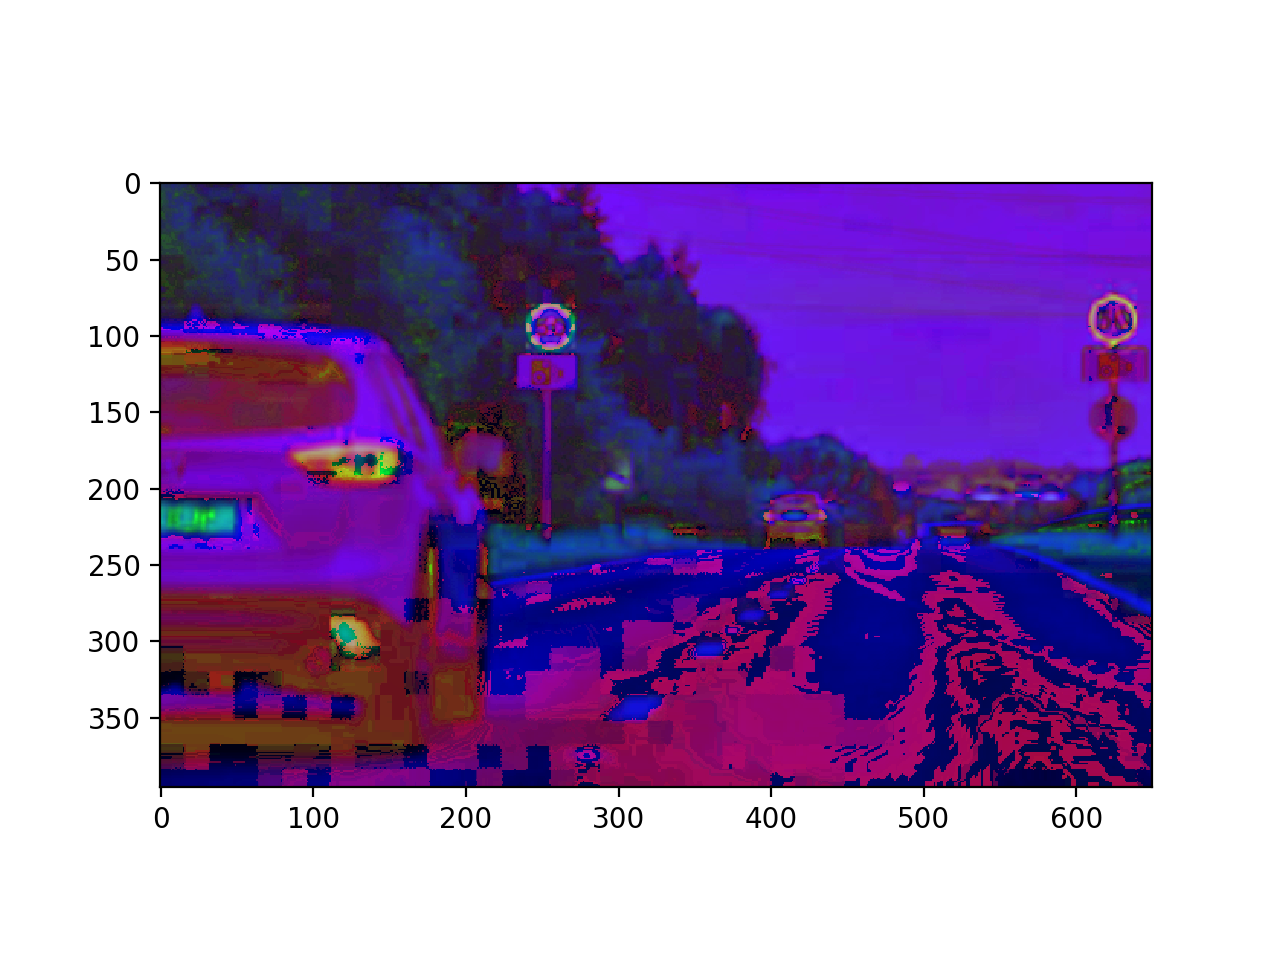

In [14]:
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img1)

In [5]:
img[380,520]

array([122,  29,  30], dtype=uint8)

In [21]:
img1[134,116]

array([  7, 226, 196], dtype=uint8)

In [5]:
img1.shape

(1800, 4157, 3)

In [15]:
#     lower_red = np.array([110,50,50]) 
#     upper_red = np.array([130,255,255]) 
# if((s>=50 and s<=255) and (h>=110 and h<=130) and (v>=50 and v<=255)):
#     if(s>=0.2 and ((h>=0 and h<=10) or (h>=320 and h<=360)))
#.  if((s>145 ) and ((h>=0 and h<10) or (h>150 and h<190))):  BEST
def isRed(pix):
    
    h,s,v = pix
    
    if((s>145 ) and ((h>=0 and h<10) or (h>150 and h<190))):
        
        return True
    
    return False



def isYellow(pix):
    
    h,s,v = pix
    
    if((s>145 ) and  (h>17 and h<31)):
        
        return True
    
    return False
    
    
def isBlue(pix):
    
    h,s,v = pix
    
    if((s>160 ) and  (h>102 and h<115)):
        
        return True
    
    return False

<IPython.core.display.Javascript object>


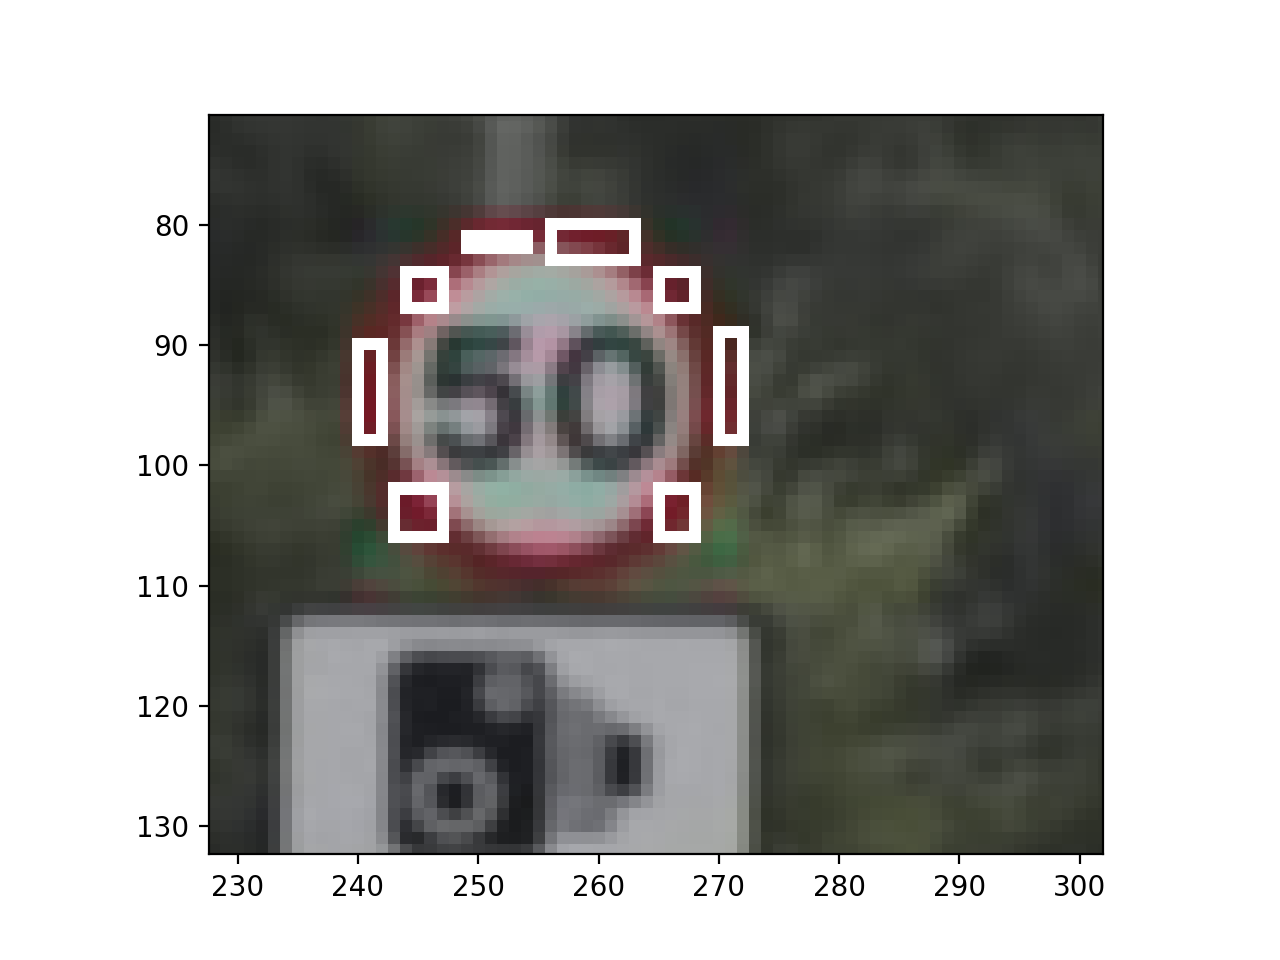

In [16]:
thresh = np.zeros(img1.shape[:2])

for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        thresh[i,j] = thresh[i,j] or isRed(img1[i,j])
        thresh[i,j] = thresh[i,j] or isBlue(img1[i,j])
        thresh[i,j] = thresh[i,j] or isYellow(img1[i,j]) 
        
plt.imshow(thresh, cmap = 'gray')
        

In [151]:
plt.imshow(np.uint8(thresh))

In [103]:
circles = cv2.HoughCircles(np.uint8(edges), cv2.HOUGH_GRADIENT, 1.5, 10)
output = np.uint8(img[75:150 , :100]).copy()
#ensure at least some circles were found
if circles is not None:
#convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    print("hello")

    for (x, y, r) in circles:
    # draw the circle in the output image, then draw a rectangle

    # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
plt.imshow(output)

In [17]:
im2, contours, hierarchy = cv2.findContours(np.uint8(thresh),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

30

In [105]:
contours[50]

IndexError: list index out of range

In [21]:
conts = []
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),1)
    cA = w*h
    conts.append([x,y,w,h,cA,i])
    
    
conts = sorted(conts, reverse = True, key = lambda value : (value[4]))

    
conts = np.array(conts)
plt.imshow(img)

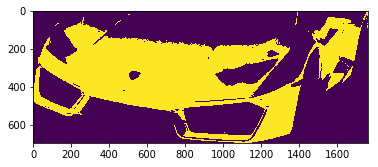

In [10]:
plt.imshow(thresh[  conts[i,1] : conts[i,1] + conts[i,3] , conts[i,0] : conts[i,0] + conts[i,2]  ])

In [55]:
contours[conts[0,5]]

array([[[ 52,  88]],

       [[ 51,  89]],

       [[ 49,  89]],

       [[ 46,  92]],

       [[ 45,  92]],

       [[ 44,  93]],

       [[ 44,  94]],

       [[ 43,  95]],

       [[ 42,  95]],

       [[ 40,  97]],

       [[ 40,  99]],

       [[ 39, 100]],

       [[ 39, 103]],

       [[ 38, 104]],

       [[ 38, 111]],

       [[ 39, 112]],

       [[ 39, 115]],

       [[ 40, 116]],

       [[ 40, 117]],

       [[ 41, 118]],

       [[ 41, 119]],

       [[ 44, 122]],

       [[ 45, 122]],

       [[ 48, 125]],

       [[ 48, 126]],

       [[ 49, 127]],

       [[ 53, 127]],

       [[ 54, 128]],

       [[ 63, 128]],

       [[ 64, 127]],

       [[ 67, 127]],

       [[ 68, 126]],

       [[ 69, 126]],

       [[ 69, 125]],

       [[ 70, 124]],

       [[ 70, 123]],

       [[ 72, 121]],

       [[ 72, 120]],

       [[ 74, 118]],

       [[ 68, 124]],

       [[ 67, 124]],

       [[ 66, 125]],

       [[ 65, 125]],

       [[ 64, 126]],

       [[ 53, 126]],

       [[ 

In [11]:
shape = "unidentified"
peri = cv2.arcLength(contours[conts[1,5]], True)
approx = cv2.approxPolyDP(contours[conts[1,5]], 0.04 * peri, True)

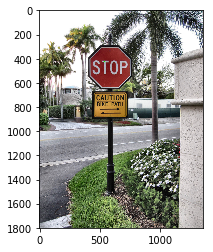

In [13]:
for i in range (len(approx)) :
    img[approx[i][0][1], approx[i][0][0]] = (0,255,0)
    
plt.imshow(img)

In [12]:
approx1 = approx.tolist()

In [13]:
approx1 = [approx1[i][0] for i in range(len(approx1))]

In [14]:
approx1

[[3325, 312],
 [3231, 407],
 [3232, 539],
 [3327, 634],
 [3461, 633],
 [3552, 540],
 [3551, 408],
 [3457, 314]]

In [166]:
pts = np.array(approx1, np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255))
plt.imshow(img)

In [111]:

k=cv2.isContourConvex(approx)
k

False

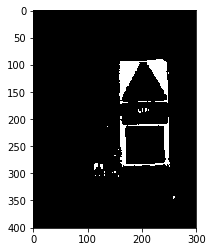

In [41]:
kernel = np.ones((2,2),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap = 'gray')
plt.imshow(img)

In [102]:
edges = cv2.Canny(np.uint8(thresh[75:150 , :100]),0,1)
plt.imshow(edges , cmap = 'gray')

In [22]:
thresh[400,520]

1.0

In [213]:
img1[274,744]

array([177, 105, 109], dtype=uint8)

In [94]:
img1[670,1283]

array([  0.        ,   7.39130435, 207.        ])

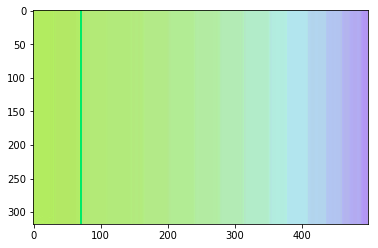

In [52]:
shades = cv2.imread('shades.jpg')
shades = cv2.cvtColor(shades , cv2.COLOR_BGR2HSV)
plt.imshow(shades)

In [54]:
np.unique(shades[:,:,0].flatten())

array([[178, 236,  96],
       [178, 236,  96],
       [178, 236,  96],
       ...,
       [178, 149, 242],
       [178, 149, 242],
       [178, 149, 242]], dtype=uint8)

In [55]:
shades.shape

(318, 499, 3)

In [63]:
np.unique(shades[:,:,0].flatten())

array([  0, 177, 178, 179], dtype=uint8)

In [99]:
np.unique(shades[:,:,1].flatten())

array([149, 151, 152, 154, 159, 168, 169, 170, 171, 172, 173, 177, 178,
       179, 180, 182, 185, 193, 194, 195, 196, 197, 198, 200, 211, 212,
       213, 214, 215, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237,
       238, 239, 240, 241, 242], dtype=uint8)

In [100]:
np.unique(shades[:,:,2].flatten())

array([ 93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 107,
       113, 115, 116, 117, 119, 120, 121, 123, 124, 125, 126, 127, 128,
       130, 135, 136, 137, 138, 141, 146, 147, 148, 150, 155, 158, 160,
       161, 162, 163, 164, 165, 166, 167, 176, 179, 180, 181, 182, 183,
       185, 186, 192, 198, 201, 202, 204, 215, 218, 220, 222, 223, 224,
       225, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245,
       249], dtype=uint8)

<IPython.core.display.Javascript object>


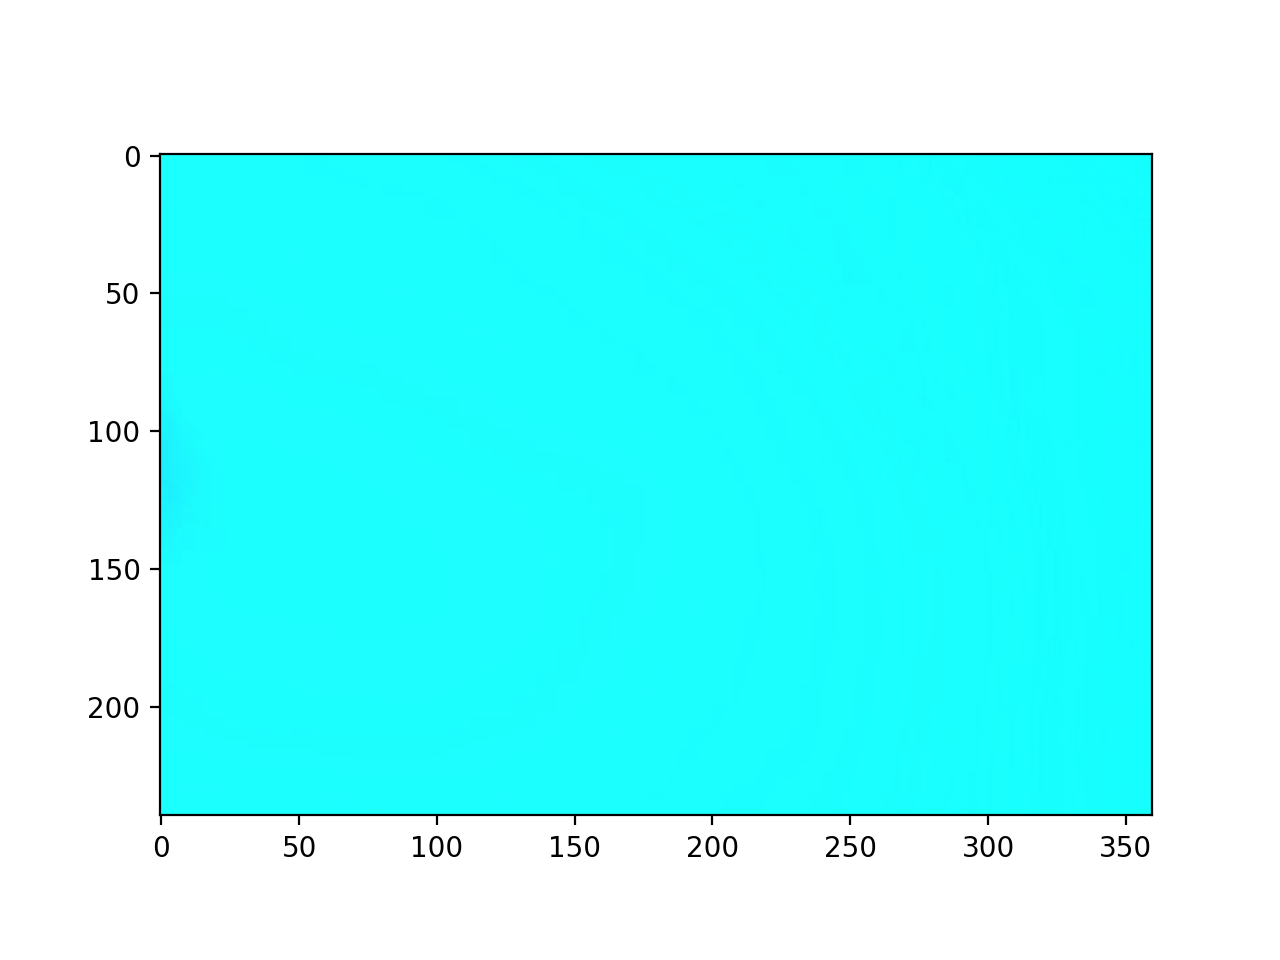

In [146]:
yshade = cv2.imread('yellow_shade.jpg')
yshade = cv2.cvtColor(yshade , cv2.COLOR_BGR2HSV)
plt.imshow(yshade)

In [147]:
np.unique(yshade[:,:,0].flatten())

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=uint8)

In [148]:
np.unique(yshade[:,:,1].flatten())

array([238, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 255], dtype=uint8)

In [21]:
def isYellow(pix):
    
    h,s,v = pix
    
    if((s>145 ) and  (h>17 and h<31)):
        
        return True
    
    return False
    

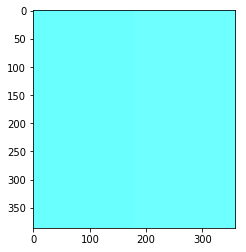

In [6]:
bshade = cv2.imread('blue_shade.png')
bshade = cv2.cvtColor(bshade , cv2.COLOR_BGR2HSV)
plt.imshow(bshade)

In [7]:
np.unique(bshade[:,:,0].flatten())

array([106, 110], dtype=uint8)

In [8]:
np.unique(bshade[:,:,1].flatten())

array([255], dtype=uint8)

In [5]:
def isBlue(pix):
    
    h,s,v = pix
    
    if((s>160 ) and  (h>102 and h<115)):
        
        return True
    
    return False

In [245]:
import pickle
pickle_in = open("./dataset/train.p","rb")
example_dict = pickle.load(pickle_in)

In [246]:
example_dict

{'sizes': array([[29, 30],
        [30, 30],
        [30, 30],
        ...,
        [58, 62],
        [63, 69],
        [68, 69]], dtype=uint8), 'coords': array([[ 5,  6, 24, 25],
        [ 5,  5, 25, 25],
        [ 5,  5, 25, 25],
        ...,
        [ 5,  6, 53, 57],
        [ 5,  7, 58, 63],
        [ 7,  6, 62, 63]], dtype=uint8), 'features': array([[[[ 75,  78,  80],
          [ 74,  76,  78],
          [ 83,  84,  83],
          ...,
          [ 67,  74,  73],
          [ 65,  69,  68],
          [ 66,  67,  66]],
 
         [[ 82,  83,  85],
          [ 80,  80,  82],
          [ 87,  86,  83],
          ...,
          [ 73,  77,  77],
          [ 75,  77,  75],
          [ 79,  79,  77]],
 
         [[ 79,  79,  81],
          [ 84,  83,  85],
          [ 91,  88,  89],
          ...,
          [ 72,  74,  72],
          [ 74,  75,  71],
          [ 78,  78,  74]],
 
         ...,
 
         [[126, 128, 133],
          [118, 123, 128],
          [108, 117, 120],
          ...,

In [247]:
example_dict.keys()

dict_keys(['sizes', 'coords', 'features', 'labels'])

In [248]:
example_dict['features'].shape

(39209, 32, 32, 3)

<IPython.core.display.Javascript object>


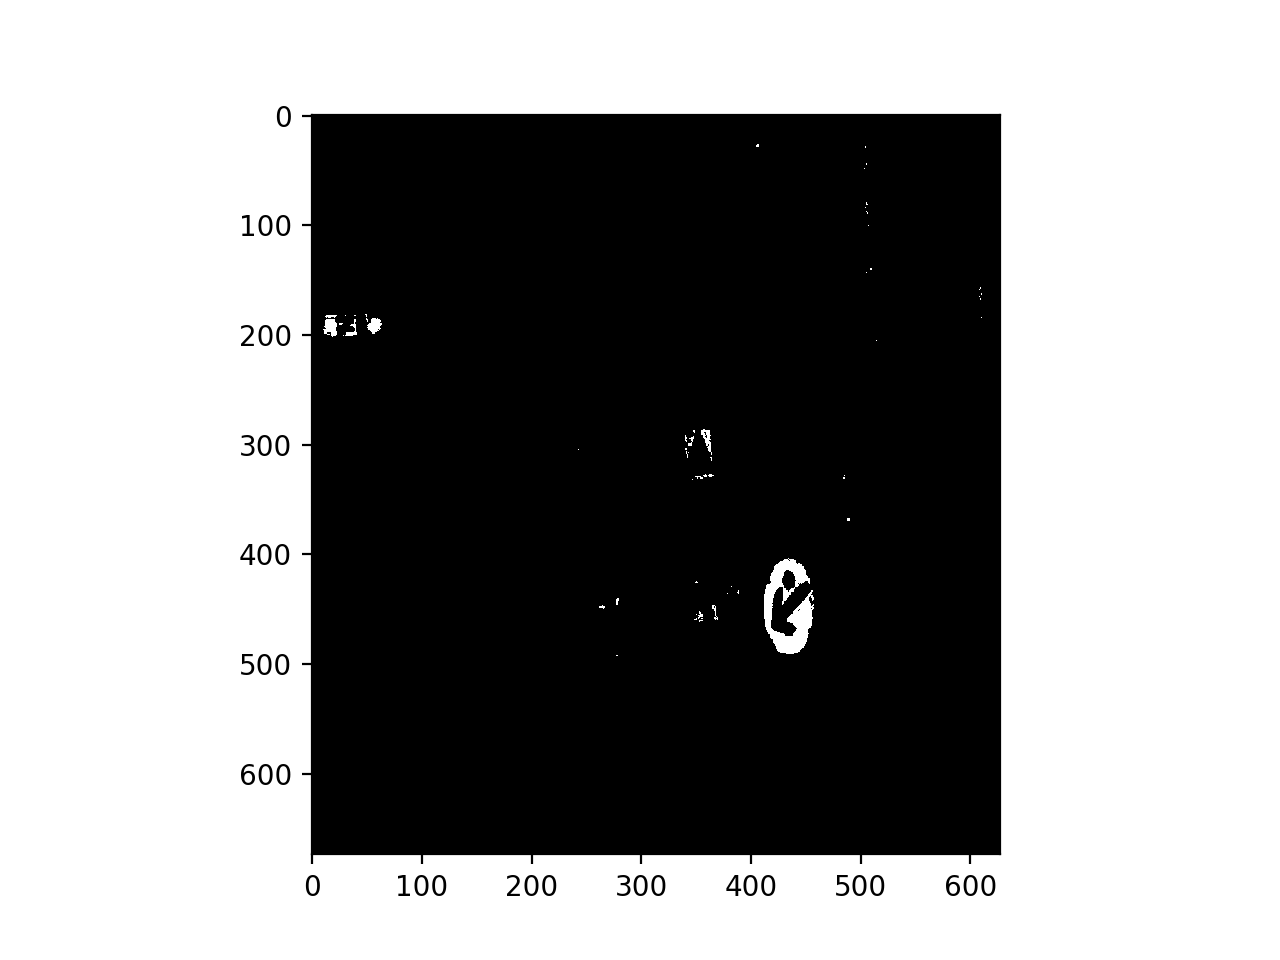

In [256]:
plt.imshow(example_dict['features'][2990])